$R^2$ of Poisson distributed neurons mean responses to a model.

The idealized neuroscientist (Wyeth Bair) would like to understand the relation between the external world and neural activity. Often this takes the form of showing stimuli and recording the responses of neurons. Of particular interest is the relation between the stimuli and the response of a neuron on average across many presentations of the stimuli. To succintly describe this function the neuroscientist attempts to parameterize their stimuli in some manner and then hypothesize a function which takes these parameterized values and transforms them into mean responses, colloguially called a tuning curve. Whether a particular tuning curve is a good description of a neurons responses to stimuli can be measured by correlating the hypothesized tuning curve with the mean responses.

Unfortunately neurons are stochastic and so the mean responses are only a noisy estimate. Furthermore the mean response of a neuron tends to be proportional to the variablility of that response so that the noise actually depends on the pattern of mean responses. Below I will try to work out the consequences of this under the assumption that the responses of a neuron are distributed as Poisson random variables.

$$Y_i \sim P(\lambda_i)$$

Where $Y$ is the response of a neuron to $n$ stimuli each with respective drive $\lambda_i$ and that response is Poisson distributed with mean $\lambda_i$. Each response to a given stimuli is IID.

And as a reminder the mean is equal to the variance: $$E[P(\lambda_i)] = Var[P(\lambda_i)] = \lambda_i$$

A typical experiment involves showing each of the $m$ stimuli $n$ times then averaging the response:

$$\bar{Y}_i = \frac{1}{n} \sum_j^n Y_{i,j} \sim \frac{1}{n} P(n \lambda_i)$$

Now to test our model we correlate these estimates to $\vec{x}$ a hypothesized mean response. And lets assume that our model is perfect because we are Dan Yamins so $a\vec{x} + b = \vec{\lambda}$ i.e. the true means are a linear function of our model. The question then is what is the distribution of $R^2 = Cor(\vec{x}, \bar{Y})^2$ (the fraction of explained variance)? Clearly because there are finite trials there will be some noise thus not all variance will be explained. Geometrically we can imagine that the vector of means of our model and our responses are pointing in the same direction, but our responses have some probability cloud centered around the mean. Thus there is a very low chance of on any given experiment for the two to point in the same direction, most of the mass is in other directions, thus on average the correlation will be less than one. 

Exactly what the average $R^2$ will be will be some function of $n$, and the $\lambda_i$

Now, working out this distribution as is would be very hard, I mean just working out all the angles between these vectors when the vectors are on a lattice is challenge. 

BUT by performing a square root transformation and invoking the CLT the problem becomes easier. First lets see what happens when we take the square root of our responses:


$$E[\sqrt{P(\lambda)}] \approx \sqrt{\lambda}$$ this is a reasonable approximation
$$Var[\sqrt{P(\lambda)}] \approx \frac{1}{4}$$ the variance becomes a known constant

so $$\bar{Y}_i = \frac{1}{n} \sum_j^n \sqrt{Y_{i,j}} \sim \frac{1}{n} \sum_j^n{\sqrt{P(\lambda_i)}}$$

$$E[\bar{Y}_i] = \frac{1}{n} \sum_j^n E[\sqrt{Y_{i,j}}] \approx \sqrt{\lambda_i}   $$
$$Var[\bar{Y}_i] = \frac{1}{n^2} \sum_j^n Var[\sqrt{Y_{i,j}}] \approx \frac{1}{4n}   $$

Furthermore since we are taking an average let us assume $\bar{Y}$ is normally distributed and so by CLT
$$\bar{Y}_i \sim N(\sqrt{\lambda_i}, \frac{1}{4n})$$

Our sample mean neural response distribution has become a spherical guassian with a known variance $\frac{1}{4n}$ but unknown mean $\sqrt{\lambda_i}$.  Our model $x_i$,  becomes, $\sqrt{x_i}$ but for simplicity lets call it $\vec{x}$ mean centered and normalized unit length and call $Y_i$ as $\vec{Y}$.

So now with the square root transformation what is the distribution of $R^2 = Cor(\vec{Y}, \vec{x})^2$?

Well the model of our responses is:
$$ \vec{Y} = \mu + \beta \vec{x} + \vec{\epsilon} $$
$$\epsilon_i \sim N(0,\frac{1}{4n})$$

$R^2$ is just $$\frac{Explained \ variance}{Total  \ variance} $$

$Explained \ variance$

is just the variance of our fit of $\vec{x}$ to $\vec{Y}$ that is 
$$|\hat{\beta}\vec{x}|^2$$
where $\hat{\beta}$ is the signed length of the projection of $\vec{x}$ on $\vec{Y}$ which has a normal distribution (it is just a linear transformation of a normal so is normal):
$$\hat{\beta} = \frac{\vec{Y} \cdot \vec{x}}{|\vec{x}|^2} = \vec{Y} \cdot \vec{x} \sim N(\beta, \frac{1}{4n})$$
so the squared length is then a scaled non-central chi-squared random variable with m degrees of freedom because it is a sum of m squared normals:
$$|\hat{\beta}\vec{x}|^2 \sim \frac{1}{4n} \chi^2_m(4n\beta^2) $$ keeping in mind that $\beta^2 = \sum_i^m{(\sqrt{\lambda_i} - \overline{{\sqrt{\lambda}}})^2}$ the squared deviates of the square root of our expected responses or the length of $\vec{Y}$.

$Total  \ variance$

is the sum of $Explained \ variance$ + $Unexplained \ variance \sim \frac{1}{4n} \chi^2_1(4n\beta^2) +  \frac{1}{4n} \chi^2_{m-1} $ where the second term is the the length of the residual variance in the m-1 dimensional space orthogonal to our model vector $\vec{x}$ which is a central chi-squared because the error has zero mean since we are Dan Yamins.

Putting this all together:
$$ R^2 \sim \frac{\frac{1}{4n} \chi^2_1(4n\beta^2)}{\frac{1}{4n} \chi^2_1(4n\beta^2) +  \frac{1}{4n} \chi^2_{m-2}} = \frac{ \chi^2_1(4n\beta^2)}{ \chi^2_1(4n\beta^2) +  \chi^2_{m-2}} $$

where again:
$$\beta^2 = \sum_i^m{(\lambda_i -\overline{\sqrt{\lambda}})^2}$$

This ratio is a known distribution called the singley non-central beta distribution which is a function of only two parameters: $\beta^2$ and $n$. Great! We now know the distribution of correlation of a neuron to a perfect model under some not too strong assumptions and its not too complicated.

Lets take stock of what this means:
This distribution is stochastically increasing in $\beta^2$ and $n$ so as one might expect with higher $n$ the correlation of the data to the perfect model gets closer to 1. But also correlation increases with $\beta^2 = \sum_i^m{(\sqrt{\lambda_i} -\overline{\sqrt{\lambda}})^2}$ the dynamic range of the neuron over the stimuli. This is a major problem because when comparing two neurons fits to a model, even if that model is perfect for both, if their dynamic range over the stimuli is different one will tend to be estimated as having a worse fit to the model. Thus the estimate is biased but also the bias is different for different number of trials or how well you drove the neuron. So we must come up with some correction and we hope to God (Hilary Clinton) the correction only requires known parameters. We also want to consider the possibility that the model isn't perfect.

In the case when the model is not perfect the distribution becomes doubly non-central beta distribution which just means $\chi^2_{m-1}$ representing the residual variance becomes a non-central chi-squared because there is a systematic difference between the expected response of the neuron and the model lets say that residual has squared length $\alpha^2$. Our geometric intuition is now that we have spherical distribution around the square root of the vector of expected response of our neurons and this vector is pointing in somewhat different direction then our model. Our distribution of correlation is essentially the result of integrating probability across cones of equal angle around our model. You can imagine the response distribution is a lollipop whose center is intersected by one of these cones whose angle is proportional to the true correlation. Since the cone turns inwards there is more probability mass outside the cone then inside thus any given sample is more likely to have a lower correlation. This gets worse with dimensionality, how close the lollipop is to start with (the cone turns more tightly) i.e. if the correlation is truly high then the absolute drop in correlation expected from noise will be greater, and the length of the lollipop stem length (dynamic range of neuron).

A simple minded but surprisingly effective approach to correcting this problem is to look at the expected value of the numerator and denominator of the doubley non central beta distribution and add something to unbias them. Luckily the bias is purely a function of the variance and in this case of the transformed Poisson the variance is known.

Since for a non-central chi-squared random variable: $E[\chi^2_m(a)] = a + m$

$$Numerator \ \ E[\frac{1}{4n} \chi^2_1(4n\beta^2)] = \frac{1}{4n} E[\chi^2_1(4n\beta^2)] = \frac{1}{4n}(1 + 4n\beta^2) = \beta^2 + \frac{1}{4n} $$

$$Denominator \ \ E[\frac{1}{4n} \chi^2_{m-2}(4n\alpha^2) + \frac{1}{4n} \chi^2_{1}(4n\beta^2)] = \alpha^2 + \frac{1}{4n}(m-2) + \beta^2 + \frac{1}{4n}$$

So the terms with n in them (the noise variance) are biasing our estimates of the true residual variance and explained variance. Since these terms are known we can just subtract them off to get an unnbiased estimate.

$$E[\frac{1}{4n} \chi^2_1(4n\beta^2) - \frac{1}{4n}] = \beta^2$$
$$ E[\frac{1}{4n} \chi^2_{m-2}(4n\alpha^2) + \frac{1}{4n} \chi^2_{1}(4n\beta^2) - \frac{1}{4n}(m-1)] = \alpha^2 + \beta^2$$

So by subtracting off a known amount we can have an unbiased estimator of the terms in the numerator and the denominator of $R^2$ where $\beta^2$ is the squared length of our expected responses projected onto our model and $\alpha^2$ is the squared length of the expected response projected $\vec{\lambda}$ into the null-space of our model.

Now even though we can individually unbiase the numerator and denominator it does not mean that their ratio will be unbiased. I have not worked out what the expectation of the ratio would be given these corrections (its some crazy integral I don't know how to do) but we can examine some simulations:


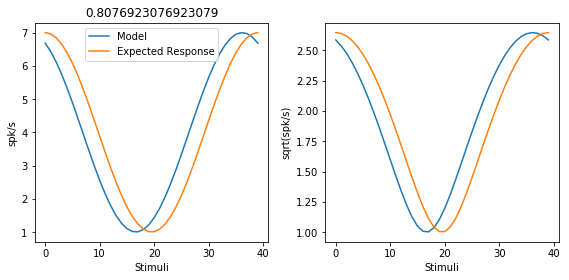

In [102]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
n = 3 #trials
m = 40 #stimuli
n_exps = 10000 #number simulations
amplitude = 3
base_line = 4
true_r2 = 0.8
angle = np.arccos(true_r2**0.5)

#create the expected responses
lambdas = base_line + (np.cos(np.linspace(0, 2*np.pi, m))*amplitude) #s
#our model is not perfect, thus its angle is some angle off
model = base_line+(np.cos(angle + np.linspace(0, 2*np.pi, m))*amplitude) #s

true_r2 = np.corrcoef(model,lambdas)[0,1]**2

plt.figure(figsize=(8,4))
plt.subplot(121)
plt.plot(model)
plt.plot(lambdas)
plt.xlabel('Stimuli');plt.ylabel('spk/s')
plt.legend(['Model','Expected Response'])
plt.title(true_r2)

plt.subplot(122)
plt.plot(np.sqrt(model))
plt.plot(np.sqrt(lambdas))
plt.xlabel('Stimuli');plt.ylabel('sqrt(spk/s)')
plt.tight_layout()


Above I plot our model and expected response, It's just a sinusoid so that shifting phase proportionally changes correlation. Below I will simulate the distribution of correlation between these two and the corrected version.

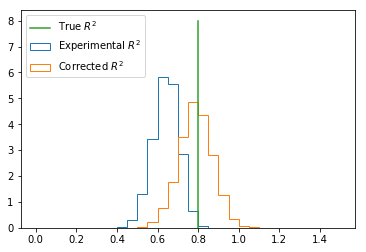

In [99]:
def r2_unbiased(y, x, sigma2, m):
    y -= y.mean()
    x -= x.mean()
    b = np.dot(y, x)/np.dot(x, x)
    y_hat = b*x#our best fit of x to y in the 1-d model space
    res = y-b*x#the left over residual in (m-2)-d null space
    num = np.sum(y_hat**2)
    den = np.sum(y_hat**2) + np.sum(res**2)
    
    R2 = (num)/(den)
    R2_corrected = (num - sigma2)/((den - (m-1)*sigma2))
    return R2_corrected, R2

sigma2 = 1/(4*n)
y = np.random.poisson(lambdas, size=(n_exps, n, m)) # n_experiments n_trials m_stimuli
y_bar = y.mean(1) # average the trials

#get the fraction of variance
r2 = np.array([r2_unbiased(np.sqrt(exp), np.sqrt(model), sigma2, m) for exp in y_bar])

plt.hist(r2[..., 1], normed=True, range=(0,1.5), histtype='step', bins=30)
plt.hist(r2[..., 0], normed=True, range=(0,1.5), bins=30, histtype='step',)

actual_r = np.corrcoef(np.sqrt(model), np.sqrt(lambdas))[0,1]**2
plt.plot([actual_r, actual_r], [0,8])
plt.legend([ r'True $R^2$',r'Experimental $R^2$', r'Corrected $R^2$' ], loc=2)
    

So the method seems to work. Clearly one concern is that the distribution can now be outside of the range of possible values of $R^2$ but if that weren't the case one could not have an unbiased estimator (if you can't go above one and your estimates have some variability, on average your estimates will be less than one even if correlaiton is in fact one). If your main concern is measuring relative differences i.e. is this cell a better fit than that cell this doesn't matter too much. Additionally other measures of fit wouldn't suffer this problem: the f-statistic is not bounded above.

Now lets try some variations

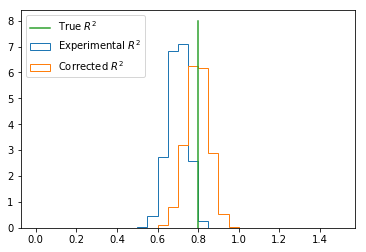

In [100]:
n = 5 #trials

sigma2 = 1/(4*n)
y = np.random.poisson(lambdas, size=(n_exps, n, m)) # n_experiments n_trials m_stimuli
y_bar = y.mean(1) # average the trials

#get the fraction of variance
r2 = np.array([r2_unbiased(np.sqrt(exp), np.sqrt(model), sigma2, m) for exp in y_bar])

plt.hist(r2[..., 1], normed=True, range=(0,1.5), histtype='step', bins=30)
plt.hist(r2[..., 0], normed=True, range=(0,1.5), bins=30, histtype='step',)

actual_r = np.corrcoef(np.sqrt(model), np.sqrt(lambdas))[0,1]**2
plt.plot([actual_r, actual_r], [0,8])
plt.legend([ r'True $R^2$',r'Experimental $R^2$', r'Corrected $R^2$' ], loc=2)

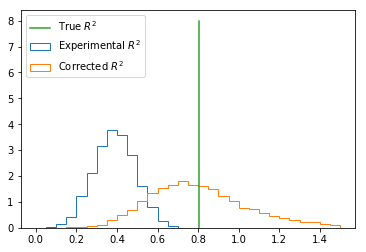

In [101]:
amplitude = 1.5
n = 3 #trials

#create the expected responses
lambdas = base_line + (np.cos(np.linspace(0, 2*np.pi, m))*amplitude) #s
#our model is not perfect, thus its angle is some angle off
model = base_line +(np.cos(angle + np.linspace(0, 2*np.pi, m))*amplitude) #s

sigma2 = 1/(4*n)
y = np.random.poisson(lambdas, size=(n_exps, n, m)) # n_experiments n_trials m_stimuli
y_bar = y.mean(1) # average the trials

#get the fraction of variance
r2 = np.array([r2_unbiased(np.sqrt(exp), np.sqrt(model), sigma2, m) for exp in y_bar])

plt.hist(r2[..., 1], normed=True, range=(0,1.5), histtype='step', bins=30)
plt.hist(r2[..., 0], normed=True, range=(0,1.5), bins=30, histtype='step',)

actual_r = np.corrcoef(np.sqrt(model), np.sqrt(lambdas))[0,1]**2
plt.plot([actual_r, actual_r], [0,8])
plt.legend([ r'True $R^2$',r'Experimental $R^2$', r'Corrected $R^2$' ], loc=2)

Decreasing the dynamic range increases the bias and variability, but the metric is still unbiased.